# E1 316-O Deep learning for robotics HW 3
# Name : Swapnil Trivedi
# SR : 13-19-01-19-52-24-1-24723
# Department : Artificial Intelligence

In [22]:
#handling imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import eig


In [23]:
# System parameters
mu = 1

# Jacobian matrices at points of interest
J_00 = np.array(
    [[0, 1],
     [-1, 1]])  # At (0,0)

J_05_05 = np.array(
    [[0, 1],
     [-1.5, 0.75]])  # At (0.5, 0.5)

J_25_0 = np.array(
    [[0, 1],
    [-1, -5.25]])  # At (2.5, 0)

In [24]:
# Function to compute eigenvalues and classify stability
def analyze_stability(J):
    eigvals = eig(J)[0]
    print("Eigenvalues:", eigvals)
    
    real_parts = np.real(eigvals)
    imag_parts = np.imag(eigvals)
    
    if np.all(real_parts < 0):
        if np.any(imag_parts != 0):
            return "Stable spiral"
        else:
            return "Stable node"
    elif np.all(real_parts > 0):
        if np.any(imag_parts != 0):
            return "Unstable spiral"
        else:
            return "Unstable node"
    else:
        return "Saddle point or mixed stability"

print("Stability at (0,0):", analyze_stability(J_00))
print("Stability at (0.5,0.5):", analyze_stability(J_05_05))
print("Stability at (2.5,0):", analyze_stability(J_25_0))


# Define the Van der Pol system for ODE integration
def van_der_pol(state, t, mu=1):
    x1, x2 = state
    dx1dt = x2
    dx2dt = mu * (1 - x1**2) * x2 - x1
    return [dx1dt, dx2dt]



Eigenvalues: [0.5+0.8660254j 0.5-0.8660254j]
Stability at (0,0): Unstable spiral
Eigenvalues: [0.375+1.16592238j 0.375-1.16592238j]
Stability at (0.5,0.5): Unstable spiral
Eigenvalues: [-0.19793902 -5.05206098]
Stability at (2.5,0): Stable node


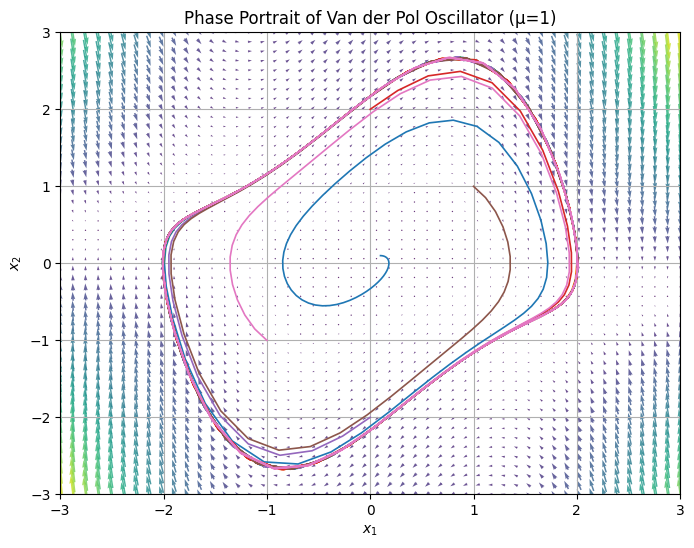

In [25]:
# Phase portrait grid
x1_vals = np.linspace(-3, 3, 50)
x2_vals = np.linspace(-3, 3, 50)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

DX1 = X2
DX2 = mu * (1 - X1**2) * X2 - X1
magnitude = np.hypot(DX1, DX2)

# Plot vector field + trajectories
plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, DX1, DX2, magnitude, pivot='mid', cmap='viridis', alpha=0.8)
plt.title('Phase Portrait of Van der Pol Oscillator (μ=1)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

# Simulate and overlay trajectories
t_span = np.linspace(0, 25, 200)
initial_conditions = [[0.1, 0.1], [2, 0], [-2, 0], [0, 2], [0, -2], [1, 1], [-1, -1]]

for ic in initial_conditions:
    sol = odeint(van_der_pol, ic, t_span, args=(mu,))
    plt.plot(sol[:, 0], sol[:, 1], lw=1.2)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()



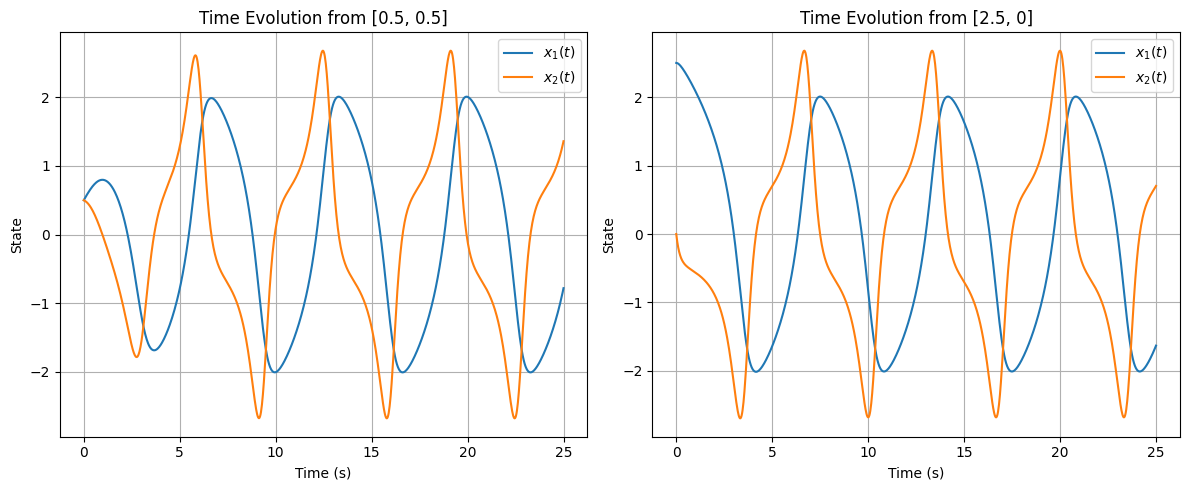

In [26]:

# Time evolution plots
t = np.linspace(0, 25, 1000)
test_conditions = [[0.5, 0.5], [2.5, 0]]

plt.figure(figsize=(12, 5))
for i, ic in enumerate(test_conditions):
    sol = odeint(van_der_pol, ic, t, args=(mu,))
    plt.subplot(1, 2, i+1)
    plt.plot(t, sol[:, 0], label='$x_1(t)$')
    plt.plot(t, sol[:, 1], label='$x_2(t)$')
    plt.title(f'Time Evolution from {ic}')
    plt.xlabel('Time (s)')
    plt.ylabel('State')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()